# Implementation
  
::::::{attention}
This page shows a preview of the assignment. Please fork and clone the assignment to work on it locally from [GitHub](https://github.com/CIEM5000-2025/practice-assignments)
::::::

::::::{versionadded} v2025.2.0 After workshop 2
Solutions workshop 2 in text and downloads 
::::::

In this notebook you will continue to implement the matrix method and check it with some sanity checks.

```{custom_download_link} ./Workshop_2_Implement_stripped.ipynb
:text: ".ipynb"
:replace_default: "True"
```

```{custom_download_link} ./Workshop_2_Implement_stripped_sol.ipynb
:text: ".ipynb solution"
:replace_default: "False"
```

```{custom_download_link} ./Workshop_2_Implement.md
:text: ".md:myst"
:replace_default: "False"
```

```{custom_download_link} https://github.com/CIEM5000-2025/practice-assignments
:text: "All files practice assignments"
:replace_default: "False"
```

```{custom_download_link} https://github.com/CIEM5000-2025/practice-assignments/tree/solution_workshop_2
:text: "All files practice assignments with solutions workshop 2"
:replace_default: "False"
```


```{exercise} 0
:label: exercise0
:nonumber: true
:class: exercise

Check whether your implementation of last week was correct using the provided solution
```

In [ ]:
import matplotlib as plt
import numpy as np
sys.path.insert(1, '/matrixmethod_solution')
import matrixmethod_solution as mm
%config InlineBackend.figure_formats = ['svg']

In [1]:
import matplotlib as plt
import numpy as np
import matrixmethod_solution as mm
%config InlineBackend.figure_formats = ['svg']

In [ ]:
import numpy as np
import matplotlib as plt
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

%load_ext autoreload
%autoreload 2

## 1. The Node class
The `Node` class from last week is unchanged and complete

## 2. The Element class

The implementation is incomplete:
- The function `add_distributed_load` should compute the equivalent load vector for a constant load $q$ in $\bar x$ and $\bar z$ direction (we'll ignore a distributed moment load now) and moves those loads to the nodes belonging to the element. Remember to use the `add_load` function of the `Node` class to store the equivalent loads (remember we have two nodes per element). Also keep local/global transformations in mind and store `self.q = q` for later use;
- The function `bending_moments` receives the nodal displacements of the element in the global coordinate system (`u_global`) and uses it to compute the value of the bending moment at `num_points` equally-spaced points along the element length. Keep local/global transformations in mind and use the ODE approach in SymPy / Maple / pen and paper to compute an expression for $M$. Do the same for for $w$ in the function `full_displacement`.

```{exercise} Workshop 2 - 2.1
:label: 2_exercise2.1
:nonumber: true
:class: exercise

Add the missing pieces to the code, before you perform the checks below.
```

````{solution} 2_exercise2.1
:class: dropdown

For the code implementations see `./matrixmethod/elements.py`:
- [`add_distributed_load`](2_exercise2_1_py_1)
- [`bending_moments`](2_exercise2_1_py_2)
- [`full_displacement`](2_exercise2_1_py_3)
````

Having made your implementations, it is now time to verify the first addition of your code with a simple sanity check. We would like to solve the following simply-supported beam:

```{figure} https://raw.githubusercontent.com/ibcmrocha/public/main/ssbeam.png
:align: center
:width: 200
```

Choose appropriate values yourself.

```{exercise-start} Workshop 2 - 2.2
:label: 2_exercise2.2
:nonumber: true
:class: exercise
```

Use the code blocks below to set up this problem. After you've added the load, print the element using `print(YOUR ELEMENT)`. Do the shown values for the nodal loads correspond with what you'd expect?

In [ ]:
#YOUR CODE HERE

In [ ]:
print(#YOUR ELEMENT HERE

```{exercise-end}
```

```{solution-start} 2_exercise2.2
:class: dropdown
```

In [2]:
EI = 1000
q  = 10
L  = 1

mm.Node.clear()
mm.Element.clear()

node1 = mm.Node (0,0)
node2 = mm.Node (L,0)

elem = mm.Element ( node1, node2 )

section = {}
section['EI'] = EI

elem.set_section (section)

elem.add_distributed_load([0,10])

In [3]:
print(elem)

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[ 0.          5.         -0.83333333]
with node #2:
 This node has:
 - x coordinate=1,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0.         5.         0.83333333]


- The vertical forces correspond to the solution from [](../lecture2/element_loads.md) $\cfrac{1}{2}qL=\cfrac{1}{2}\cdot 10 \cdot 1=5$
- The moments correspond to the solution from [](../lecture2/element_loads.md) $\cfrac{1}{12}qL^2=\cfrac{1}{12}\cdot 10 \cdot 1^2 \approx 0.833$

```{solution-end}
```

```{exercise-start} Workshop 2 - 2.3
:label: 2_exercise2.3
:nonumber: true
:class: exercise
```

Now solve the nodal displacements. Once you are done, compare the rotation at the right end of the beam. Does it match a solution you already know?

In [ ]:
#YOUR CODE HERE

```{exercise-end}
```

```{solution-start} 2_exercise2.3
:class: dropdown
```

In [4]:
con = mm.Constrainer()

con.fix_dof (node1,0)
con.fix_dof (node1,1)
con.fix_dof (node2,1)
print(con)

global_k = elem.stiffness()
global_f = np.zeros (6)

global_f[0:3] = node1.p
global_f[3:6] = node2.p

Kc, Fc = con.constrain ( global_k, global_f )
u_free = np.matmul ( np.linalg.inv(Kc), Fc )
print(u_free)

This constrainer has constrained the degrees of freedom: [0, 1, 4] with corresponding constrained values: [0, 0, 0])
[-0.00041667  0.          0.00041667]


The rotations corresponds with the forget-me-not solution $\cfrac{qL^3}{24\cdot EI} = \cfrac{10 \cdot 1^3}{24\cdot 1000} \approx 0.0004166$

```{solution-end}
```


```{exercise-start} Workshop 2 - 2.4
:label: 2_exercise2.4
:nonumber: true
:class: exercise
```

Calculate the bending moment at midspan and plot the moment distribution using `plot_moment_diagram`. Do the values and shape match with what you'd expect?

In [ ]:
u_elem = con.full_disp(#YOUR CODE HERE)
#YOUR CODE HERE

```{exercise-end}
```

```{solution-start} 2_exercise2.4
:class: dropdown
```

[-1.48029737e-16  1.25000000e+00 -1.48029737e-16]


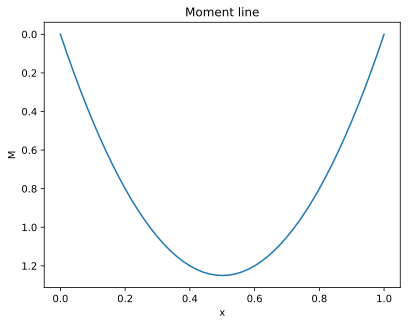

In [5]:
u_elem = con.full_disp(u_free)[elem.global_dofs()] #keep this line
moments = elem.bending_moments(u_elem,3)
print(moments)
elem.plot_moment_diagram(u_elem,num_points=51)

- The moment corresponds with the well known solution $\cfrac{1}{8}qL^2=\cfrac{1}{8}\cdot 10 \cdot 1^2 = 1.25$
- The shape is parabolic, as expected.

```{solution-end}
```

```{exercise-start} Workshop 2 - 2.5
:label: 2_exercise2.5
:nonumber: true
:class: exercise
```

Calculate the deflection at midspan and plot the deflected structure using `plot_displaced`. Do the values and shape match with what you'd expect?

In [ ]:
#YOUR CODE HERE

```{exercise-end}
```

```{solution-start} 2_exercise2.5
:class: dropdown
```

(array([0., 0., 0.]), array([0.        , 0.00013021, 0.        ]))


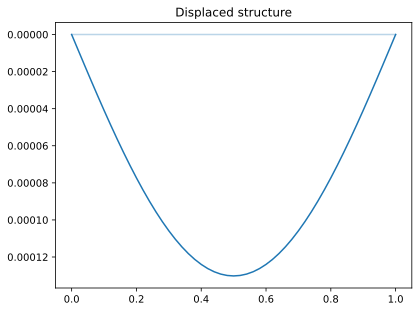

In [6]:
deflections = elem.full_displacement(u_elem,3)
print(deflections)
elem.plot_displaced(u_elem,num_points=51,global_c=False)

- The deflection corresponds with the forget-me-not solution $\cfrac{5}{384} \cfrac{qL^4}{EI}=\cfrac{5}{384} \cfrac{10 \cdot 1^4}{1000} \approx 0.0001302$
- The shape of the deflection is a 4th order polynomial, as expected.

```{solution-end}
```

## 3. The Constrainer class

We're going to expand our Constrainer class, but the implementation is incomplete:
- The constrainer class should be able to handle non-zero boundary conditions too. `constrain` should be adapted to do so + the docstring of the class itself. Furthermore, the assert statement of `fix_dof` should be removed.
- The function `support_reactions` is incomplete. Since the constrainer is always first going to get `constrain` called, here we already have access to `self.free_dofs`. Together with `self.cons_dofs`, you should have all you need to compute reactions. Note that `f` is also passed as argument. Make sure you take into account the contribution of equivalent element loads that go directly into the supports without deforming the structure.

```{exercise} Workshop 2 - 3.1
:label: 2_exercise3.1
:nonumber: true
:class: exercise

Add the missing pieces to the code and docstring, before you perform the checks below.

```

````{solution} 2_exercise3.1
:class: dropdown

For the code implementations see `./matrixmethod/constrainer.py`:
- [`constrain`](2_exercise3_1_py_1)
- [`support_reactions`](2_exercise3_1_py_2)
````

We're going to verify our implementation. Therefore, we're going to solve an extension bar, supported at both ends, with a load $q$.

```{figure} https://raw.githubusercontent.com/ibcmrocha/public/main/sanitycheck_3.2.png
:align: center
:width: 200
```

Choose appropriate values yourself.


```{exercise-start} Workshop 2 - 3.2
:label: 2_exercise3.2
:nonumber: true
:class: exercise
```

Can you say on beforehand what will be the displacements? And what will be the support reactions?

Use the code blocks below to set up and solve this problem and check the required quantities to make sure your implementation is correct.

In [ ]:
#YOUR CODE HERE

```{exercise-end}
```

```{solution-start} 2_exercise3.2
:class: dropdown
```

- The displacements will be zero, as everything is fixed
- The support reactions should be each $\cfrac{1}{2}qL = \cfrac{1}{2}\cdot 10 \cdot 1 = 5$ to the left

In [7]:
EA = 1000
q = 10
L  = 1

mm.Node.clear()
mm.Element.clear()

node1 = mm.Node (0,0)
node2 = mm.Node (L,0)

elem = mm.Element ( node1, node2 )

section = {}
section['EA'] = EA

elem.set_section (section)
elem.add_distributed_load([q,0])
print(elem)

con = mm.Constrainer()

con.fix_node (node1)
con.fix_node (node2)

print(con)

global_k = elem.stiffness()
global_f = np.zeros (6)

global_f[0:3] = node1.p
global_f[3:6] = node2.p

Kc, Fc = con.constrain ( global_k, global_f )
u_free = np.matmul ( np.linalg.inv(Kc), Fc )
print(u_free)

print(con.support_reactions(global_k,u_free,global_f))

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[5. 0. 0.]
with node #2:
 This node has:
 - x coordinate=1,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[5. 0. 0.]
This constrainer has constrained the degrees of freedom: [0, 1, 2, 3, 4, 5] with corresponding constrained values: [0, 0, 0, 0, 0, 0])
[]
[-5.  0.  0. -5.  0.  0.]


```{solution-end}
```

Again, we're going to verify our implementation. Therefore, we're going solve a beam, with a load $F$ and support displacement $\bar w$ for the right support.

```{figure} https://raw.githubusercontent.com/ibcmrocha/public/main/sanitycheck_3.3_new.png
:align: center
:width: 200
```

Choose appropriate values yourself.

```{exercise-start} Workshop 2 - 3.3
:label: 2_exercise3.3
:nonumber: true
:class: exercise
```

Use the code blocks below to set up and solve this problem and check the required quantities to make sure your implementation is correct.

In [ ]:
#YOUR CODE HERE

```{exercise-end}
```

```{solution-start} 2_exercise3.3
:class: dropdown
```

In [8]:
EI = 1000
F  = 10
L  = 1
w_B = 0.1

mm.Node.clear()
mm.Element.clear()

node1 = mm.Node (0,0)
node2 = mm.Node (L,0)
node2.add_load([0,F,0])

elem = mm.Element ( node1, node2 )

section = {}
section['EI'] = EI

elem.set_section (section)

print(elem)

con = mm.Constrainer()

con.fix_node (node1)
con.fix_dof (node2,1,w_B)

print(con)

global_k = elem.stiffness()
global_f = np.zeros (6)

global_f[0:3] = node1.p
global_f[3:6] = node2.p

Kc, Fc = con.constrain ( global_k, global_f )
u_free = np.matmul ( np.linalg.inv(Kc), Fc )
print(u_free)

print(con.support_reactions(global_k,u_free,global_f))

Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=1,
 - z coordinate=0,
 - degrees of freedom=[3, 4, 5],
 - load vector=[ 0. 10.  0.]
This constrainer has constrained the degrees of freedom: [0, 1, 2, 4] with corresponding constrained values: [0, 0, 0, 0.1])
[ 0.   -0.15]
[   0. -300.  300.  290.]


- The rotation at B corresponds with the forget-me-not solution $\cfrac{3}{2} \cfrac{w_B}{L}=\cfrac{3}{2} \cdot \cfrac{0.1}{1} = 0.15$
- The moment at A corresponds with the ODE solution of $\cfrac{3  EI}{L^2 w_B}=\cfrac{3 \cdot 1000}{1^2 \cdot 0.1} = 300$
- The vertical support reaction at A corresponds with the ODE solution of $\cfrac{3  EI}{L^3 w_B}=\cfrac{3 \cdot 1000}{1^3 \cdot 0.1} = 300$
- The vertical support reaction at B corresponds with the ODE solution of $\cfrac{3  EI}{L^3 w_B}=\cfrac{3 \cdot 1000}{1^3 \cdot 0.1} = 300$ minus the load $F = 10$. The $10$ and $290$ together are equal to the reaction force of $300$

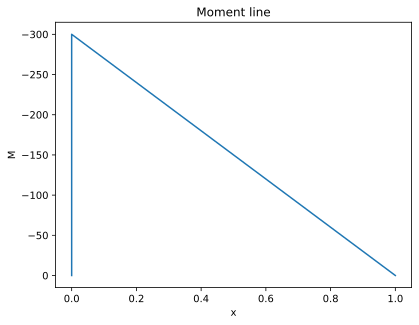

In [9]:
u_elem = con.full_disp(u_free)[elem.global_dofs()]
elem.plot_moment_diagram(u_elem,num_points=51)

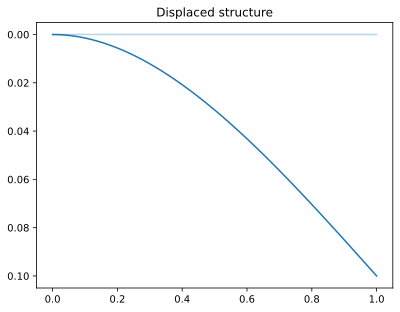

In [10]:
deflections = elem.full_displacement(u_elem,3)
elem.plot_displaced(u_elem,num_points=51,global_c=False)

- The moment line and displacement line look as expected.

```{solution-end}
```